# FACTOR ANALYSIS Exercise 2: 
Data on self rating of 32 personality traits of 240 participants are
given in Factor_Analysis_Ex1.csv. Can you reduce the 32 variables into less
number of factors?

In [74]:
#Import the packages
import pandas as mypd
import matplotlib.pyplot as myplot
from sklearn.preprocessing import StandardScaler as z
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bartlett
from factor_analyzer.factor_analyzer import calculate_kmo as kmo

In [75]:
#Import the data
mydata=mypd.read_excel('D:/Python_ISI/data/Factor_Analysis_Ex1.xlsx')

In [76]:
#Explore the data
mydata.head()

,SL No,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
0,1,2,7,1,4,7,8,5,9,5,...,7,9,9,5,5,5,7,5,5,8
1,2,3,8,2,7,5,8,4,8,5,...,2,7,6,6,4,3,7,2,2,7
2,3,6,6,2,5,1,8,2,9,2,...,5,8,7,4,5,5,7,6,2,8
3,4,3,7,6,7,8,8,2,8,3,...,3,8,4,7,6,6,6,4,3,7
4,5,7,3,3,5,8,6,7,2,3,...,6,6,7,5,5,3,3,7,5,5


In [77]:
#Clean up the data by removing respondent id column
mydata=mydata.iloc[:,1:33]
mydata.head()

,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,relaxed,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
0,2,7,1,4,7,8,5,9,5,6,...,7,9,9,5,5,5,7,5,5,8
1,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
2,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
3,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
4,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5


In [78]:
#Compute Correlation matrix
round(mydata.corr(),3)

,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,relaxed,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
distant,1.000,-0.443,0.178,-0.156,0.231,-0.119,0.237,-0.205,0.196,-0.141,...,0.155,-0.262,0.448,-0.173,0.185,0.049,-0.044,0.634,0.321,-0.115
talkative,-0.443,1.000,0.068,0.165,-0.104,0.096,-0.106,0.121,0.083,0.037,...,-0.071,0.082,-0.593,0.023,-0.025,0.012,0.072,-0.507,-0.244,0.196
careless,0.178,0.068,1.000,-0.244,0.180,0.010,0.125,-0.300,0.185,-0.000,...,0.413,-0.195,0.053,-0.539,0.045,0.266,0.103,0.231,0.293,-0.023
hardworking,-0.156,0.165,-0.244,1.000,0.057,0.039,0.117,0.219,-0.085,-0.141,...,-0.499,0.149,-0.190,0.474,0.107,-0.304,-0.129,-0.158,-0.310,-0.097
anxious,0.231,-0.104,0.180,0.057,1.000,0.062,0.680,0.026,0.190,-0.419,...,0.132,-0.133,0.271,-0.073,0.201,-0.033,-0.264,0.280,0.272,-0.264
agreeble,-0.119,0.096,0.010,0.039,0.062,1.000,-0.069,0.436,-0.196,0.292,...,-0.029,0.509,0.081,-0.011,-0.209,0.094,0.189,-0.146,-0.096,0.257
tense,0.237,-0.106,0.125,0.117,0.680,-0.069,1.000,-0.067,0.228,-0.557,...,0.132,-0.194,0.237,-0.026,0.244,-0.139,-0.376,0.248,0.269,-0.352
kind,-0.205,0.121,-0.300,0.219,0.026,0.436,-0.067,1.000,-0.189,0.159,...,-0.218,0.451,0.006,0.329,-0.076,-0.076,0.018,-0.234,-0.248,0.191
opposing,0.196,0.083,0.185,-0.085,0.190,-0.196,0.228,-0.189,1.000,-0.105,...,0.141,-0.278,0.034,-0.121,0.446,0.019,-0.040,0.190,0.081,-0.081
relaxed,-0.141,0.037,-0.000,-0.141,-0.419,0.292,-0.557,0.159,-0.105,1.000,...,0.076,0.249,-0.071,-0.054,-0.190,0.284,0.590,-0.155,-0.183,0.462


In [79]:
#Descriptive summary
mydata.describe()

,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,relaxed,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.866667,5.883333,3.412500,6.925000,5.129167,6.629167,4.616667,6.970833,3.858333,5.475000,...,4.179167,6.695833,4.604167,6.154167,5.170833,4.083333,5.245833,3.754167,2.675000,6.066667
std,1.794615,1.677732,1.811357,1.370108,1.880305,1.372162,1.904337,1.262255,1.599141,1.694009,...,1.893941,1.197619,1.880750,1.963363,1.745282,1.664713,1.790837,1.769684,1.553307,1.601429
min,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,5.000000,2.000000,6.000000,4.000000,6.000000,3.000000,6.000000,3.000000,4.000000,...,3.000000,6.000000,3.000000,5.000000,4.000000,3.000000,4.000000,2.000000,1.750000,5.000000
50%,3.000000,6.000000,3.000000,7.000000,5.000000,7.000000,5.000000,7.000000,4.000000,5.000000,...,4.000000,7.000000,5.000000,6.000000,5.000000,4.000000,5.000000,3.000000,2.000000,6.000000
75%,5.000000,7.000000,5.000000,8.000000,7.000000,8.000000,6.000000,8.000000,5.000000,7.000000,...,5.000000,7.000000,6.000000,8.000000,6.000000,5.000000,7.000000,5.000000,4.000000,7.000000
max,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000,8.000000,9.000000


In [80]:
#Scale the data
myzdata=z().fit_transform(mydata)

In [81]:
#Make the format to DataFrame
myzdata=mypd.DataFrame(myzdata,columns=mydata.columns)

In [82]:
#Descriptive summary
round(myzdata.describe(),4)

,distant,talkative,careless,hardworking,anxious,agreeble,tense,kind,opposing,relaxed,...,lazy,cooperative,quiet,organized,critical,lax,laidbck,withdraw,giving up,easygoing
count,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,...,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000,240.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,...,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,...,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021,1.0021
min,-1.6007,-2.3195,-1.3347,-3.6021,-2.2006,-4.1110,-1.9031,-3.9463,-1.7912,-2.6472,...,-1.6821,-3.0924,-1.9204,-2.6307,-2.3948,-1.8560,-2.3758,-1.5596,-1.0806,-2.5447
25%,-1.0423,-0.5276,-0.7814,-0.6765,-0.6018,-0.4595,-0.8507,-0.7707,-0.5379,-0.8725,...,-0.6239,-0.5822,-0.8547,-0.5891,-0.6723,-0.6521,-0.6971,-0.9933,-0.5967,-0.6675
50%,-0.4839,0.0697,-0.2282,0.0549,-0.0688,0.2708,0.2017,0.0232,0.0888,-0.2810,...,-0.0948,0.2545,0.2109,-0.0787,-0.0981,-0.0502,-0.1376,-0.4270,-0.4355,-0.0417
75%,0.6328,0.6670,0.8782,0.7862,0.9970,1.0011,0.7279,0.8170,0.7154,0.9021,...,0.4343,0.2545,0.7437,0.9421,0.4761,0.5518,0.9816,0.7055,0.8548,0.5840
max,2.3080,1.8615,3.0912,1.5176,2.0629,1.7314,2.3066,1.6109,2.5953,2.0852,...,2.5507,1.9280,2.3422,1.4525,2.1986,2.9596,2.1007,1.8380,3.4353,1.8355


In [83]:
#Compute KMO statistics
kmo_all,kmo_model=kmo(myzdata)

C:\Users\Anannya\anaconda31\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [84]:
round(kmo_model,4)

0.843

In [85]:
#Bartlett Test
mytest=bartlett(myzdata)

In [86]:
test_statistics=mytest[0]
round(test_statistics,4)

4009.5449

In [87]:
#p value
p_value=mytest[1]
round(p_value,4)

0.0

In [88]:
#Factor Analysis
mymodel=FactorAnalyzer(n_factors=32,rotation=None)

In [89]:
#Fit to the data
mymodel=mymodel.fit(myzdata)

In [90]:
#Eigen values & vectors
eigen_values,vectors=mymodel.get_eigenvalues()

In [91]:
eigen_values=mypd.DataFrame(eigen_values,columns=['Variance'])

In [92]:
eigen_values

,Variance
0,7.240707
1,4.525090
2,3.124057
3,2.333589
4,1.878361
5,1.194064
6,0.926864
7,0.855380
8,0.796846
9,0.712879


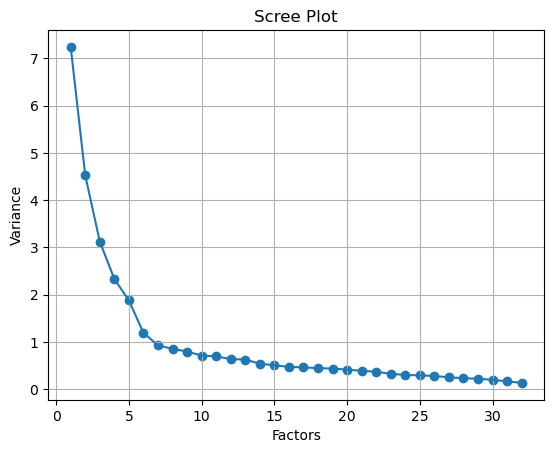

In [93]:
#Scree Plot
x=range(1,33)
myplot.scatter(x,eigen_values)
myplot.plot(x,eigen_values)
myplot.title('Scree Plot')
myplot.xlabel('Factors')
myplot.ylabel('Variance')
myplot.grid()
myplot.show()

In [99]:
#Compute the loadings
myloadings=mymodel.loadings_
myloadings=mypd.DataFrame(myloadings)

In [103]:
#Final Factor Analysis
mymodel=FactorAnalyzer(n_factors=6,rotation='varimax')

In [104]:
#Fit the model to the data
mymodel=mymodel.fit(myzdata)

In [105]:
#Loadings
myloadings=mymodel.loadings_
myloadings=mypd.DataFrame(myloadings)

In [106]:
round(myloadings,3)

,0,1,2,3,4,5
0,0.602,0.014,0.068,-0.123,0.268,0.156
1,-0.753,0.058,-0.031,0.114,0.149,0.126
2,0.050,-0.282,0.065,-0.062,0.210,0.647
3,-0.175,0.687,0.136,0.100,0.050,-0.160
4,0.174,-0.016,0.690,0.152,0.208,0.126
5,-0.018,0.039,-0.065,0.632,-0.188,0.099
6,0.164,0.033,0.770,0.006,0.257,0.072
7,-0.112,0.202,0.038,0.624,-0.161,-0.234
8,-0.014,-0.082,0.090,-0.132,0.648,0.068
9,-0.022,-0.125,-0.694,0.336,-0.065,0.050
